In [1]:
import pandas as pd

# Define a function to read CSV files with a specific date format
def read_csv_with_date_format(filepath, date_format):
    return pd.read_csv(filepath, parse_dates=True, index_col=0, date_parser=lambda x: pd.to_datetime(x, format=date_format))

In [2]:
# Specify the date format used in the CSV files
date_format = "%d/%m/%Y"

# List of CSV file paths containing real estate trend data
estate_trends = ["mortgage_interest_rates.csv", "house_vacancy_rate.csv", "cpi_housing_data.csv"]

# Read each CSV file into a DataFrame and store them in a list
dfs = [read_csv_with_date_format(f, date_format) for f in estate_trends]

# Concatenate all DataFrames along the columns (axis=1)
estate_trends = pd.concat(dfs, axis=1)

In [3]:
# Forward fill missing values to handle missing data
estate_trends = estate_trends.ffill()

# Drop any remaining rows with missing values
estate_trends = estate_trends.dropna()

# Display the final DataFrame
estate_trends

,MORTGAGE INTEREST,VACANCY RATE,CPI
DATE,,,
2014-03-01,6.01,6.2,102.3
2014-03-02,3.98,6.2,102.3
2014-03-03,4.81,6.2,102.3
2014-03-04,4.64,6.2,102.3
2014-03-05,6.33,6.2,102.3
...,...,...,...
2024-02-26,6.96,4.8,123.5
2024-02-27,5.18,4.8,123.5
2024-02-28,7.06,4.8,123.5


In [4]:
# Read the house trends data
house_trends_data = pd.read_csv('House_Trend_Data.csv', parse_dates=True, index_col=0)

# Display the house_trends_data DataFrame
house_trends_data

,Median House Price,Median Sales Price
Date,,
2014-03-02,295820.29,283643.30
2014-03-09,281609.86,286505.36
2014-03-16,282880.97,299075.03
2014-03-23,268373.31,274728.74
2014-03-30,278871.91,273137.53
...,...,...
2024-01-28,984604.88,979987.77
2024-02-04,977052.47,1006894.66
2024-02-11,1018595.69,976799.74


In [5]:
# Merge the dataframes
merged_dfs = estate_trends.merge(house_trends_data, left_index=True, right_index=True, how='inner')

# Rename columns appropriately
merged_dfs.columns = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price", "Median House Price"]

In [6]:
merged_dfs

,Mortgage Interest,Vacancy Rate,CPI,Median Sales Price,Median House Price
2014-03-02,3.98,6.2,102.3,295820.29,283643.30
2014-03-09,5.29,6.2,102.3,281609.86,286505.36
2014-03-16,5.70,6.2,102.4,282880.97,299075.03
2014-03-23,5.02,6.2,102.4,268373.31,274728.74
2014-03-30,5.89,6.2,102.5,278871.91,273137.53
...,...,...,...,...,...
2024-01-28,4.84,4.8,123.3,984604.88,979987.77
2024-02-04,4.56,4.8,123.3,977052.47,1006894.66
2024-02-11,4.87,4.8,123.4,1018595.69,976799.74
2024-02-18,6.75,4.8,123.4,998769.47,989712.74


<AxesSubplot: >

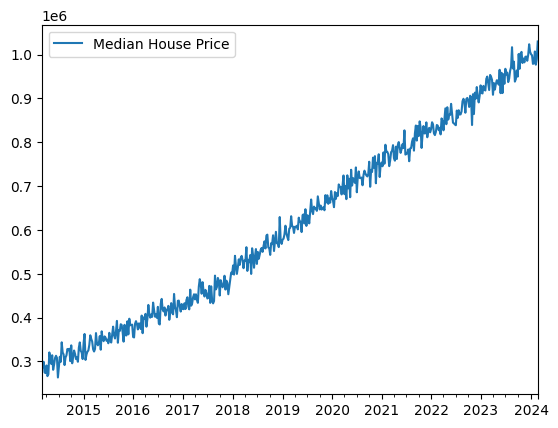

In [7]:
merged_dfs["adj_price"] = merged_dfs["Median Sales Price"] / merged_dfs["CPI"] * 100
merged_dfs["adj_value"] = merged_dfs["Median House Price"] / merged_dfs["CPI"] * 100
merged_dfs.plot.line(y="Median House Price", use_index=True)

In [8]:
merged_dfs["next_quarter"] = merged_dfs["adj_price"].shift(-13)

In [9]:
merged_dfs.dropna(inplace=True)
merged_dfs

,Mortgage Interest,Vacancy Rate,CPI,Median Sales Price,Median House Price,adj_price,adj_value,next_quarter
2014-03-02,3.98,6.2,102.3,295820.29,283643.30,289169.393939,277266.177908,298127.752918
2014-03-09,5.29,6.2,102.3,281609.86,286505.36,275278.455523,280063.890518,275998.746356
2014-03-16,5.70,6.2,102.4,282880.97,299075.03,276250.947266,292065.458984,271738.804665
2014-03-23,5.02,6.2,102.4,268373.31,274728.74,262083.310547,268289.785156,285135.912621
2014-03-30,5.89,6.2,102.5,278871.91,273137.53,272070.156098,266475.639024,264996.864078
...,...,...,...,...,...,...,...,...
2023-10-29,5.40,4.6,122.8,967449.97,1005980.46,787825.708469,819202.328990,798544.103812
2023-11-05,6.41,4.6,122.8,998516.89,980681.57,813124.503257,798600.627036,792418.872668
2023-11-12,6.22,4.6,122.9,984265.51,990847.00,800866.973149,806222.131814,825442.212318
2023-11-19,5.92,4.6,122.9,981164.55,982051.35,798343.816111,799065.378356,809375.583468


In [10]:
merged_dfs["change"] = (merged_dfs["next_quarter"] > merged_dfs["adj_price"]).astype(int)

In [11]:
merged_dfs

,Mortgage Interest,Vacancy Rate,CPI,Median Sales Price,Median House Price,adj_price,adj_value,next_quarter,change
2014-03-02,3.98,6.2,102.3,295820.29,283643.30,289169.393939,277266.177908,298127.752918,1
2014-03-09,5.29,6.2,102.3,281609.86,286505.36,275278.455523,280063.890518,275998.746356,1
2014-03-16,5.70,6.2,102.4,282880.97,299075.03,276250.947266,292065.458984,271738.804665,0
2014-03-23,5.02,6.2,102.4,268373.31,274728.74,262083.310547,268289.785156,285135.912621,1
2014-03-30,5.89,6.2,102.5,278871.91,273137.53,272070.156098,266475.639024,264996.864078,0
...,...,...,...,...,...,...,...,...,...
2023-10-29,5.40,4.6,122.8,967449.97,1005980.46,787825.708469,819202.328990,798544.103812,1
2023-11-05,6.41,4.6,122.8,998516.89,980681.57,813124.503257,798600.627036,792418.872668,0
2023-11-12,6.22,4.6,122.9,984265.51,990847.00,800866.973149,806222.131814,825442.212318,1
2023-11-19,5.92,4.6,122.9,981164.55,982051.35,798343.816111,799065.378356,809375.583468,1


In [12]:
merged_dfs["change"].value_counts()

1    380
0    129
Name: change, dtype: int64

In [13]:
# predictors = ["Mortgage Interest", "Vacancy Rate", "adj_price", "adj_value"]
# target = "change"

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# START = 260
# STEP = 52

# def predict(train, test, predictors, target):
#     rf = RandomForestClassifier(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # allow us to not to use future data to predict the past 
# def backtest(data, predictors, target):
#     all_preds = []
#     for i in range(START, data.shape[0], STEP):
#         train = merged_dfs.iloc[:i]
#         test = merged_dfs.iloc[i:(i+STEP)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, accuracy_score(data.iloc[START:][target], preds)

# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# preds, accuracy = backtest(merged_dfs, predictors + yearly_ratios, target)
# accuracy

In [14]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score

# # Assume you already have your data loaded into merged_dfs

# # Define predictors and target variable
# predictors = ["Mortgage Interest", "Vacancy Rate", "adj_price", "adj_value"]
# target = "change"

# # Function to predict using RandomForestClassifier
# def predict(train, test, predictors, target):
#     rf = RandomForestClassifier(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # Function for backtesting
# def backtest(data, predictors, target):
#     all_preds = []
#     for i in range(START, data.shape[0], STEP):
#         train = merged_dfs.iloc[:i]
#         test = merged_dfs.iloc[i:(i+STEP)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, accuracy_score(data.iloc[START:][target], preds)

# # Rolling mean features
# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# # Backtesting
# preds, accuracy = backtest(merged_dfs, predictors + yearly_ratios, target)
# print("Accuracy before improvements:", accuracy)

# # Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors + yearly_ratios], merged_dfs[target], test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier(random_state=1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Predictions using the best model
# best_preds = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, best_preds)
# print("Accuracy after hyperparameter tuning:", accuracy)
# print("Best hyperparameters:", best_params)


In [15]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Assuming merged_dfs is your dataset and already loaded
# # Define predictors and target variable
# predictors = ["Mortgage Interest", "Vacancy Rate", "adj_price", "adj_value"]
# target = "change"

# # Function to predict using RandomForestClassifier
# def predict(train, test, predictors, target):
#     rf = RandomForestClassifier(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # Function for backtesting
# def backtest(data, predictors, target, start=260, step=52):
#     all_preds = []
#     for i in range(start, data.shape[0], step):
#         train = data.iloc[:i]
#         test = data.iloc[i:(i+step)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, accuracy_score(data.iloc[start:][target], preds)

# # Rolling mean features
# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# # Backtesting
# preds, accuracy = backtest(merged_dfs, predictors + yearly_ratios, target)
# print("Accuracy before improvements:", accuracy)

# # Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors + yearly_ratios], merged_dfs[target], test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier(random_state=1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Predictions using the model
# best_preds = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, best_preds)
# print("Accuracy after hyperparameter tuning:", accuracy)
# print("Best hyperparameters:", best_params)

# # Example future features input by the user
# future_features = {
#     "Mortgage Interest": [4.82],
#     "Vacancy Rate": [9.6],
#     "adj_price": [126445.024128],
#     "adj_value": [121427.353623]
# }

# # Convert future features to DataFrame
# future_data = pd.DataFrame(future_features)

# # Ensure future data includes the derived features
# def add_yearly_ratios(data, predictors):
#     yearly = data.rolling(52, min_periods=1).mean()
#     yearly_ratios = [p + "_year" for p in predictors]
#     for p, y in zip(predictors, yearly_ratios):
#         data[y] = data[p] / yearly[p]
#     return data

# # Add yearly ratios to future data
# full_data = merged_dfs.append(future_data, ignore_index=True)
# full_data = add_yearly_ratios(full_data, predictors)

# # Extract only the future data with the new features
# future_data_with_ratios = full_data.iloc[-1:][predictors + yearly_ratios]

# # Predict function for future data using the best model
# def predict_future(model, future_data):
#     return model.predict(future_data)

# # Make prediction for the future data
# future_prediction = predict_future(best_rf, future_data_with_ratios)

# # Print prediction
# print("Predicted price change for next quarter:", future_prediction[0])


In [16]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Assuming merged_dfs is your dataset and already loaded
# # Define predictors and target variable
# predictors = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price", "Median House Price", "adj_price", "adj_value"]
# target = "change"

# # Function to predict using RandomForestClassifier
# def predict(train, test, predictors, target):
#     rf = RandomForestClassifier(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # Function for backtesting
# def backtest(data, predictors, target, start=260, step=52):
#     all_preds = []
#     for i in range(start, data.shape[0], step):
#         train = data.iloc[:i]
#         test = data.iloc[i:(i+step)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, accuracy_score(data.iloc[start:][target], preds)

# # Rolling mean features
# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# # Fill NaN values with column means
# merged_dfs.fillna(merged_dfs.mean(), inplace=True)

# # Backtesting
# preds, accuracy = backtest(merged_dfs, predictors + yearly_ratios, target)
# print("Accuracy before improvements:", accuracy)

# # Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors + yearly_ratios], merged_dfs[target], test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier(random_state=1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Predictions using the model
# best_preds = best_rf.predict(X_test)
# accuracy = accuracy_score(y_test, best_preds)
# print("Accuracy after hyperparameter tuning:", accuracy)
# print("Best hyperparameters:", best_params)

# # Example future features input by the user
# future_features = {
#     "Mortgage Interest": [4.82],
#     "Vacancy Rate": [9.6],
#     "CPI": [105.0],
#     "Median Sales Price": [320000.0],
#     "Median House Price": [315000.0]
# }

# # Convert future features to DataFrame
# future_data = pd.DataFrame(future_features)

# # Ensure future data includes the derived features
# def add_yearly_ratios(data, predictors):
#     yearly = data.rolling(52, min_periods=1).mean()
#     yearly_ratios = [p + "_year" for p in predictors]
#     for p, y in zip(predictors, yearly_ratios):
#         data[y] = data[p] / yearly[p]
#     return data

# # Add yearly ratios to future data
# full_data = merged_dfs.append(future_data, ignore_index=True)
# full_data = add_yearly_ratios(full_data, predictors)

# # Fill NaN values with column means
# full_data.fillna(full_data.mean(), inplace=True)

# # Extract only the future data with the new features
# future_data_with_ratios = full_data.iloc[-1:][predictors + yearly_ratios]

# # Predict function for future data using the best model
# def predict_future(model, future_data):
#     return model.predict(future_data)

# # Make prediction for the future data
# future_prediction = predict_future(best_rf, future_data_with_ratios)

# # Print prediction
# print("Predicted price change for next quarter:", future_prediction[0])
# print("Model accuracy on test data:", accuracy)


In [17]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load your dataset
# # Assuming merged_dfs is your dataset and already loaded
# # Define predictors and target variable
# predictors = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price", "Median House Price", "adj_price", "adj_value"]
# target = "Median House Price"

# # Function to predict using RandomForestRegressor
# def predict(train, test, predictors, target):
#     rf = RandomForestRegressor(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # Function for backtesting
# def backtest(data, predictors, target, start=260, step=52):
#     all_preds = []
#     for i in range(start, data.shape[0], step):
#         train = data.iloc[:i]
#         test = data.iloc[i:(i+step)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, np.sqrt(mean_squared_error(data.iloc[start:][target], preds))

# # Rolling mean features
# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# # Fill NaN values with column means
# merged_dfs.fillna(merged_dfs.mean(), inplace=True)

# # Backtesting
# preds, rmse = backtest(merged_dfs, predictors + yearly_ratios, target)
# print("RMSE before improvements:", rmse)

# # Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors + yearly_ratios], merged_dfs[target], test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestRegressor(random_state=1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Predictions using the model
# best_preds = best_rf.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, best_preds))
# print("RMSE after hyperparameter tuning:", rmse)
# print("Best hyperparameters:", best_params)

# # Example future features input by the user
# future_features = {
#     "Mortgage Interest": [4.82],
#     "Vacancy Rate": [9.6],
#     "CPI": [105.0],
#     "Median Sales Price": [320000.0],
#     "Median House Price": [315000.0],
#     "adj_price": [315000.0], # Example adjustment, ensure it is appropriate
#     "adj_value": [315000.0]  # Example adjustment, ensure it is appropriate
# }

# # Convert future features to DataFrame
# future_data = pd.DataFrame(future_features)

# # Ensure future data includes the derived features
# def add_yearly_ratios(data, predictors):
#     yearly = data.rolling(52, min_periods=1).mean()
#     yearly_ratios = [p + "_year" for p in predictors]
#     for p, y in zip(predictors, yearly_ratios):
#         data[y] = data[p] / yearly[p]
#     return data

# # Add yearly ratios to future data
# full_data = merged_dfs.append(future_data, ignore_index=True)
# full_data = add_yearly_ratios(full_data, predictors)

# # Fill NaN values with column means
# full_data.fillna(full_data.mean(), inplace=True)

# # Extract only the future data with the new features
# future_data_with_ratios = full_data.iloc[-1:][predictors + yearly_ratios]

# # Predict function for future data using the best model
# def predict_future(model, future_data):
#     return model.predict(future_data)

# # Make prediction for the future data
# future_prediction = predict_future(best_rf, future_data_with_ratios)

# # Print prediction
# print("Predicted median house price for next quarter:", future_prediction[0])
# print("Model RMSE on test data:", rmse)


In [18]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load your dataset
# # Assuming merged_dfs is your dataset and already loaded
# # Define predictors and target variable
# predictors = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price", "Median House Price"]
# target = "Median House Price"

# # Function to predict using RandomForestRegressor
# def predict(train, test, predictors, target):
#     rf = RandomForestRegressor(min_samples_split=10, random_state=1)
#     rf.fit(train[predictors], train[target])
#     preds = rf.predict(test[predictors])
#     return preds

# # Function for backtesting
# def backtest(data, predictors, target, start=260, step=52):
#     all_preds = []
#     for i in range(start, data.shape[0], step):
#         train = data.iloc[:i]
#         test = data.iloc[i:(i+step)]
#         all_preds.append(predict(train, test, predictors, target))
    
#     preds = np.concatenate(all_preds)
#     return preds, np.sqrt(mean_squared_error(data.iloc[start:][target], preds))

# # Rolling mean features
# yearly = merged_dfs.rolling(52, min_periods=1).mean()
# yearly_ratios = [p + "_year" for p in predictors]
# merged_dfs[yearly_ratios] = merged_dfs[predictors] / yearly[predictors]

# # Fill NaN values with column means
# merged_dfs.fillna(merged_dfs.mean(), inplace=True)

# # Backtesting
# preds, rmse = backtest(merged_dfs, predictors + yearly_ratios, target)
# print("RMSE before improvements:", rmse)

# # Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors + yearly_ratios], merged_dfs[target], test_size=0.2, random_state=42)

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestRegressor(random_state=1)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Predictions using the model
# best_preds = best_rf.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, best_preds))
# print("RMSE after hyperparameter tuning:", rmse)
# print("Best hyperparameters:", best_params)

# # Example future features input by the user
# future_features = {
#     "Mortgage Interest": [4.82],
#     "Vacancy Rate": [9.6],
#     "CPI": [105.0],
#     "Median Sales Price": [320000.0],
#     "Median House Price": [315000.0]
# }

# # Convert future features to DataFrame
# future_data = pd.DataFrame(future_features)

# # Ensure future data includes the derived features
# def add_yearly_ratios(data, predictors):
#     yearly = data.rolling(52, min_periods=1).mean()
#     yearly_ratios = [p + "_year" for p in predictors]
#     for p, y in zip(predictors, yearly_ratios):
#         data[y] = data[p] / yearly[p]
#     return data

# # Add yearly ratios to future data
# full_data = merged_dfs.append(future_data, ignore_index=True)
# full_data = add_yearly_ratios(full_data, predictors)

# # Fill NaN values with column means
# full_data.fillna(full_data.mean(), inplace=True)

# # Extract only the future data with the new features
# future_data_with_ratios = full_data.iloc[-1:][predictors + yearly_ratios]

# # Predict function for future data using the best model
# def predict_future(model, future_data):
#     return model.predict(future_data)

# # Make prediction for the future data
# future_prediction = predict_future(best_rf, future_data_with_ratios)

# # Print prediction
# print("Predicted median house price for next quarter:", future_prediction[0])
# print("Model RMSE on test data:", rmse)


In [19]:
# import matplotlib.pyplot as plt

# # Plot actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, best_preds, color='blue', label='Predicted', marker='o')  # Predicted values
# plt.scatter(y_test, y_test, color='red', label='Actual', marker='x')  # Actual values

# # Plot errors
# for i in range(len(y_test)):
#     plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], best_preds[i]], color='gray', linestyle='-', linewidth=0.5)

# plt.xlabel('Actual Median House Price')
# plt.ylabel('Predicted Median House Price')
# plt.title('Actual vs. Predicted Median House Prices')
# plt.legend()
# plt.grid(True)
# plt.show()


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load your dataset
# Assuming merged_dfs is your dataset and already loaded
# Define predictors and target variable
predictors = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price",]
target = "Median House Price"

# Function to predict using RandomForestRegressor
def predict(train, test, predictors, target):
    rf = RandomForestRegressor(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

# Function for backtesting
def backtest(data, predictors, target, start=260, step=52):
    all_preds = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i]
        test = data.iloc[i:(i+step)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, np.sqrt(mean_squared_error(data.iloc[start:][target], preds)), mean_absolute_error(data.iloc[start:][target], preds), r2_score(data.iloc[start:][target], preds)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors], merged_dfs[target], test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predictions using the model
best_preds = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, best_preds))
mae = mean_absolute_error(y_test, best_preds)
r2 = r2_score(y_test, best_preds)
print("RMSE after hyperparameter tuning:", rmse)
print("MAE after hyperparameter tuning:", mae)
print("R-squared after hyperparameter tuning:", r2)
print("Best hyperparameters:", best_params)

# Example future features input by the user
future_features = {
    "Mortgage Interest": [4.82],
    "Vacancy Rate": [8.6],
    "CPI": [105.0],
    "Median Sales Price": [1332000.0]
}

# Convert future features to DataFrame
future_data = pd.DataFrame(future_features)

# Predict function for future data using the best model
def predict_future(model, future_data):
    return model.predict(future_data)

# Make prediction for the future data
future_prediction = predict_future(best_rf, future_data[predictors])

# Print prediction
print("Predicted median house price for next quarter:", future_prediction[0])


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE after hyperparameter tuning: 19100.305249759003
MAE after hyperparameter tuning: 14990.225392380054
R-squared after hyperparameter tuning: 0.9927654404138272
Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Predicted median house price for next quarter: 436374.31403379166


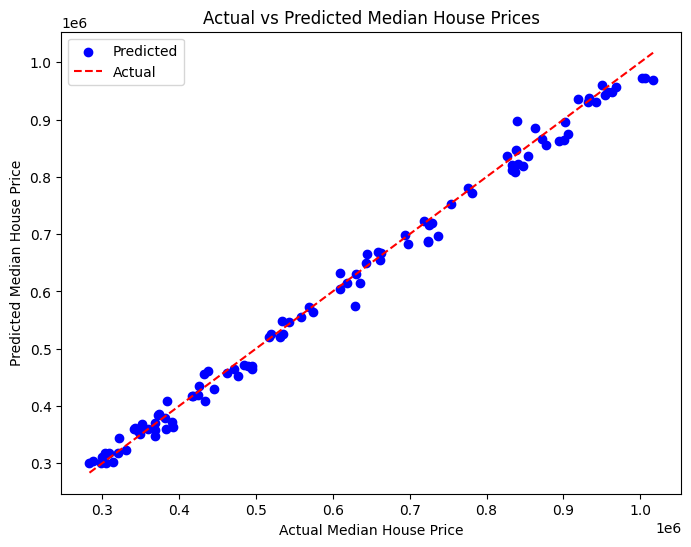

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted median house prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_preds, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Median House Price')
plt.ylabel('Predicted Median House Price')
plt.title('Actual vs Predicted Median House Prices')
plt.legend()
plt.show()
